In [1]:
import pandas as pd
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
hr_data = pd.read_csv(file_path)
print(hr_data.head())
print(hr_data.isnull().sum())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

hr_data = hr_data.dropna()


label_encoders = {}
categorical_columns = hr_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    hr_data[column] = label_encoders[column].fit_transform(hr_data[column])

# Define the features (X) and the target (y)
X = hr_data.drop(columns=['Attrition'])
y = hr_data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the model
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8707482993197279
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294

Confusion Matrix:
 [[252   3]
 [ 35   4]]


Feature Importances:
 MonthlyIncome               0.073837
OverTime                    0.064478
Age                         0.056932
DailyRate                   0.050487
TotalWorkingYears           0.048571
MonthlyRate                 0.047255
EmployeeNumber              0.045013
HourlyRate                  0.043471
DistanceFromHome            0.042607
YearsAtCompany              0.042209
NumCompaniesWorked          0.036109
JobRole                     0.032350
PercentSalaryHike           0.032169
StockOptionLevel            0.031961
YearsWithCurrManager        0.028311
JobLevel                    0.027504
YearsInCurrentRole          0.027235
YearsSinceLastPromotion     0.026657
JobSatisfaction             0.025795
TrainingTimesLastYear       0.025433
MaritalStatus               0.024680
EnvironmentSatisfaction     0.024062
EducationField              0.023323
JobInvolvement              0.023076
RelationshipSatisfaction    0.020569
WorkLifeBalance             0.019712
Education       

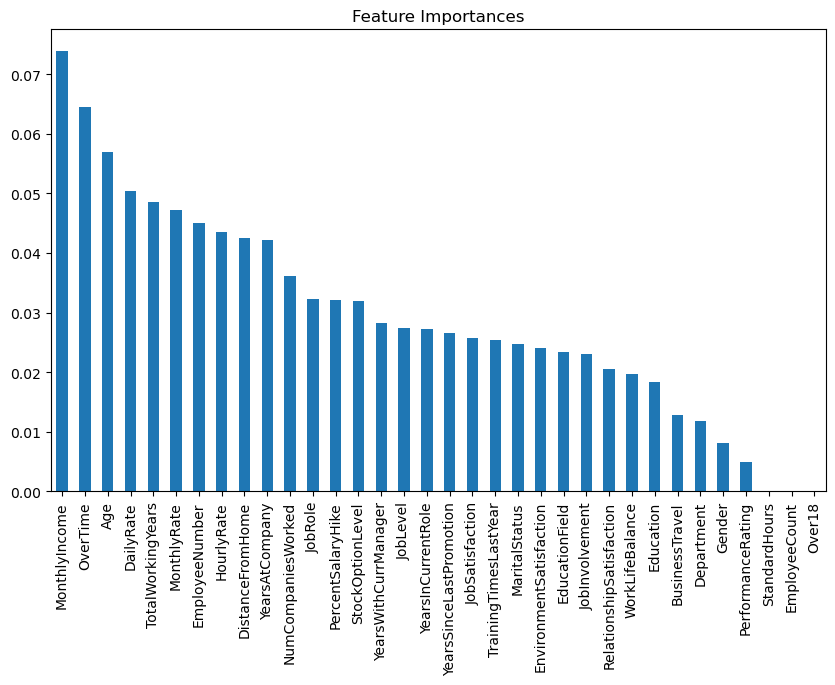

In [4]:
# Print feature importances
feature_importances = rf_clf.feature_importances_
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)
print("Feature Importances:\n", importances)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()
